Accuracy: 0.9670861568247822

Confusion Matrix:
 [[901   3]
 [ 31  98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.76      0.85       129

    accuracy                           0.97      1033
   macro avg       0.97      0.88      0.92      1033
weighted avg       0.97      0.97      0.97      1033



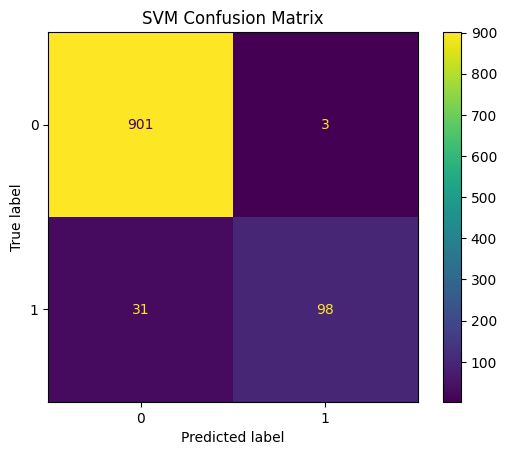

In [ ]:

# IMPORT LIBRARIES

import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# LOAD DATASET

df = pd.read_excel("../Spam_Email_Detection.xlsx")

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

# Rename columns safely (adjust if needed)
df = df.rename(columns={
    df.columns[0]: 'label',
    df.columns[1]: 'text'
})

# DATA CLEANING

df = df.dropna(subset=['label'])
df['text'] = df['text'].fillna("")
df = df.drop_duplicates()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

# Ensure label is numeric
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['label'] = df['label'].astype(int)

# TF-IDF ENCODING

X = df['text']
y = df['label']

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_tfidf = tfidf.fit_transform(X)


# FEATURE SCALING

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)


# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y.values,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# SVM MODEL

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# VISUALIZATION – CONFUSION MATRIX

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("SVM Confusion Matrix")
plt.show()

